In [1]:
import pandas as pd
import numpy as np

import nfl_data_py as nfl
import requests
from bs4 import BeautifulSoup
import mfl.api.data_loaders as mfldata
import time

In [ ]:
years = range(2010, 2023)
data = nfl.import_weekly_data(years)
draft = nfl.import_draft_picks(years)
test_case = 'Shedeur Sanders'

shed = mfldata.scrape_NFL_REF_QB(player_name='Shedeur Sanders')

all_qbs = draft[draft['position'] == 'QB']
all_qb_names = all_qbs['pfr_player_name'].unique().tolist()

all_qbs = draft[draft['position'] == 'QB']
all_qb_names = all_qbs['pfr_player_name'].unique().tolist()

In [11]:
years = range(2010, 2023)
data = nfl.import_weekly_data(years)
draft = nfl.import_draft_picks(years)

Downcasting floats.


In [12]:
draft[draft['position'] == 'QB']

(149, 36)

In [17]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrape_NFL_REF_QB(player_name):

    first_name = player_name.split(' ')[0].lower()
    last_name = player_name.split(' ')[1].lower()
    player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-1.html'
    html_content = requests.get(player_url).text
    
    # if player_name == 'Zach Wilson':
    #     first_name = player_name.split(' ')[0].lower()
    #     last_name = player_name.split(' ')[1].lower()
    #     player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-3.html'
    #     html_content = requests.get(player_url).text
        
    # if player_name == 'Justin Fields' or player_name == 'Jordan Love':
    #     first_name = player_name.split(' ')[0].lower()
    #     last_name = player_name.split(' ')[1].lower()
    #     player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-2.html'
    #     html_content = requests.get(player_url).text
    
    # if player_name == 'Daniel Jones':
    #     first_name = player_name.split(' ')[0].lower()
    #     last_name = player_name.split(' ')[1].lower()
    #     player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-4.html'
    #     html_content = requests.get(player_url).text
    
    # if player_name == 'Josh Allen':
    #     first_name = player_name.split(' ')[0].lower()
    #     last_name = player_name.split(' ')[1].lower()
    #     player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-7.html'
    #     html_content = requests.get(player_url).text

    # if player_name == 'Mitchell Trubisky':
    #     first_name = player_name.split(' ')[0].lower()
    #     first_name = 'Mitch'
    #     last_name = player_name.split(' ')[1].lower()
    #     player_url = 'https://www.sports-reference.com/cfb/players/mitch-trubisky-1.html'
    #     html_content = requests.get(player_url).text

    if len(player_name.split(' ')) > 2:
        first_name = player_name.split(' ')[0].lower()
        last_name = player_name.split(' ')[1].lower()
        suffix = player_name.split(' ')[2].lower()
        player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-{suffix}-1.html'
        html_content = requests.get(player_url).text
    

    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find('table', {'id': 'passing_standard'})

    if not table:
        for idx in range(2, 6):
            time.sleep(3)
            first_name = player_name.split(' ')[0].lower()
            last_name = player_name.split(' ')[1].lower()
            player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-{idx}.html'
            html_content = requests.get(player_url).text
            
            soup = BeautifulSoup(html_content, 'html.parser')
            table = soup.find('table', {'id': 'passing_standard'})
            
            if not table:
                print(f"Passing stats table not found for {player_name}. Failed on index {idx}")
            else:
                print(f"Player found on index {idx}")
                break
    
    try:
        baseline_headers = []
        headers = [th.getText() for th in table.find_all('th')]
        rows = []
        for tr in table.find_all('tr')[1:]:
            cells = [td.getText() for td in tr.find_all('td')]
            if cells: 
                rows.append(cells)
        
        yr_college = len(rows) - 1

        column_names = [
        'G',        
        'Cmp',      
        'Att',      
        'Cmp%',     
        'Yds',      
        'TD',       
        'TD%',      
        'Int',      
        'Int%',     
        'Y/A',      
        'AY/A',     
        'Y/C',      
        'Y/G',      
        'Rate',
        'seasons',
        'name'
        ]
        
        totals = rows[len(rows)-1]
        totals = [stat for stat in totals if stat.strip()]
        totals.append(yr_college)
        totals.append(player_name)

        if len(totals) == len(column_names):
            final = pd.DataFrame({name: [value] for name, value in zip(column_names, totals)})
        else:
            print("Error: Number of stats does not match number of column names.")

        return final    
    except:
        print(f"FAILED: On {player_name}")

In [10]:
player_name = 'Zach Wilson'

first_name = player_name.split(' ')[0].lower()
last_name = player_name.split(' ')[1].lower()
player_url = f'https://www.sports-reference.com/cfb/players/{first_name}-{last_name}-3.html'
html_content = requests.get(player_url).text

soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table', {'id': 'passing_standard'})


In [12]:
table

In [15]:
all_qbs = draft[draft['position'] == 'QB']
all_qb_names = all_qbs['pfr_player_name'].unique().tolist()

In [21]:
all_qb_names

['Sam Bradford',
 'Tim Tebow',
 'Jimmy Clausen',
 'Colt McCoy',
 'Mike Kafka',
 'John Skelton',
 'Jonathan Crompton',
 'Rusty Smith',
 'Dan LeFevour',
 'Tony Pike',
 'Levi Brown',
 'Sean Canfield',
 'Zac Robinson',
 'Cam Newton',
 'Jake Locker',
 'Blaine Gabbert',
 'Christian Ponder',
 'Andy Dalton',
 'Colin Kaepernick',
 'Ryan Mallett',
 'Ricky Stanzi',
 'T.J. Yates',
 'Nathan Enderle',
 'Tyrod Taylor',
 'Greg McElroy',
 'Andrew Luck',
 'Robert Griffin III',
 'Ryan Tannehill',
 'Brandon Weeden',
 'Brock Osweiler',
 'Russell Wilson',
 'Nick Foles',
 'Kirk Cousins',
 'Ryan Lindley',
 'B.J. Coleman',
 'Chandler Harnish',
 'EJ Manuel',
 'Geno Smith',
 'Mike Glennon',
 'Matt Barkley',
 'Ryan Nassib',
 'Tyler Wilson',
 'Landry Jones',
 'Brad Sorensen',
 'Zac Dysert',
 'B.J. Daniels',
 'Sean Renfree',
 'Blake Bortles',
 'Johnny Manziel',
 'Teddy Bridgewater',
 'Derek Carr',
 'Jimmy Garoppolo',
 'Logan Thomas',
 'Tom Savage',
 'Aaron Murray',
 'A.J. McCarron',
 'Zach Mettenberger',
 'David Fa

In [24]:
raw_data = []
for name in all_qb_names:
    print(name)
    raw_data.append(scrape_NFL_REF_QB(player_name=name))
    time.sleep(3)

Sam Bradford
Tim Tebow
Jimmy Clausen
Colt McCoy
Mike Kafka
John Skelton
Passing stats table not found for John Skelton. Failed on index 2
Passing stats table not found for John Skelton. Failed on index 3
Passing stats table not found for John Skelton. Failed on index 4
Passing stats table not found for John Skelton. Failed on index 5
FAILED: On John Skelton
Jonathan Crompton
Rusty Smith
Dan LeFevour
Tony Pike
Levi Brown
Sean Canfield
Zac Robinson
Cam Newton
Jake Locker
Blaine Gabbert
Christian Ponder
Andy Dalton
Colin Kaepernick
Ryan Mallett
Ricky Stanzi
T.J. Yates
Passing stats table not found for T.J. Yates. Failed on index 2
Passing stats table not found for T.J. Yates. Failed on index 3
Passing stats table not found for T.J. Yates. Failed on index 4
Passing stats table not found for T.J. Yates. Failed on index 5
FAILED: On T.J. Yates
Nathan Enderle
Tyrod Taylor
Greg McElroy
Andrew Luck
Robert Griffin III
Ryan Tannehill
Brandon Weeden
Brock Osweiler
Russell Wilson
Nick Foles
Kirk Co

In [31]:
extracted_data = pd.concat([i for i in raw_data if i is not None])

In [62]:
extracted_data.to_csv('~/Desktop/mfl_project/mfl/data/extracted_qb_ref.csv', index=False)

In [40]:
all_qbs[['pfr_player_name', 'seasons_started']].to_clipboard()

In [65]:
data[data['player_display_name'] == ''].groupby('recent_team').agg({'season':'nunique'})

,season
recent_team,
DET,2
LA,5


In [ ]:
sns.pairplot(data)

In [87]:
extracted_data

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,seasons,name
0,31,604,893,67.6,8403,88,9.9,16,1.8,9.4,10.57,13.9,271.1,175.6,3,Sam Bradford
0,55,661,995,66.4,9285,88,8.8,16,1.6,9.3,10.38,14.0,168.8,170.8,4,Tim Tebow
0,35,695,1110,62.6,8148,60,5.4,27,2.4,7.3,7.33,11.7,232.8,137.2,3,Jimmy Clausen
0,53,1157,1645,70.3,13253,112,6.8,45,2.7,8.1,8.19,11.5,250.1,155.0,4,Colt McCoy
0,30,408,637,64.1,4265,19,3.0,20,3.1,6.7,5.88,10.5,142.2,123.9,4,Mike Kafka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,23,459,747,61.4,5557,46,6.2,22,2.9,7.4,7.35,12.1,241.6,138.4,7,Davis Webb
0,37,614,999,61.5,7138,53,5.3,29,2.9,7.1,6.90,11.6,192.9,133.2,4,Joshua Dobbs
0,10,20,43,46.5,94,0,0.0,2,4.7,2.2,0.09,4.7,9.4,55.6,7,Nathan Peterman
0,38,721,1189,60.6,9972,69,5.8,24,2.0,8.4,8.64,13.8,262.4,146.2,3,Brad Kaaya


In [120]:
processing = data[data['player_display_name'].isin(all_qb_names)].sort_values(['player_display_name', 'season']).groupby(['player_display_name', 'recent_team'], sort=False).agg({'season':'nunique'}).reset_index()
final_years_1st_team = processing.groupby('player_display_name').agg({'season':'first'})

In [122]:
final_years_1st_team.reset_index()

,player_display_name,season
0,Andrew Luck,6
1,Andy Dalton,9
2,B.J. Daniels,1
3,Bailey Zappe,1
4,Baker Mayfield,4
...,...,...
114,Tua Tagovailoa,3
115,Tyrod Taylor,4
116,Will Grier,1
117,Zach Mettenberger,2


In [85]:
draft_teams = data[data['player_display_name'].isin(all_qb_names)].groupby(['player_display_name']).agg({'recent_team':'first'})

In [91]:
df_with_teams = pd.merge(left=extracted_data, 
                         right=draft_teams, 
                         left_on='name',
                         right_on='player_display_name',
                         how='left')

In [98]:
draft.columns

Index(['season', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category',
       'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started',
       'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks'],
      dtype='object')

In [105]:
df_with_draft_teams = pd.merge(left=all_qbs[['pfr_player_name', 'round', 'pick', 'season']],
                               right=df_with_teams,
                               left_on='pfr_player_name',
                               right_on='name',
                               how='left'
                               )

In [130]:
final_years_1st_team = final_years_1st_team.rename(columns={'season':'seasons_with_draft_team'})

In [131]:
final = pd.merge(left=df_with_draft_teams,
                 right=final_years_1st_team,
                 left_on='name',
                 right_on='player_display_name',
                 how='left')

In [134]:
final.columns

Index(['pfr_player_name', 'round', 'pick', 'season', 'G', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate',
       'seasons', 'name', 'recent_team', 'seasons_with_draft_team'],
      dtype='object')

In [146]:
final = final[['pfr_player_name', 'round', 'pick', 'season', 'G', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate',
       'seasons','recent_team', 'seasons_with_draft_team']]

In [147]:
final = final.rename(columns={'season':'draft_year','pfr_player_name':'player_name', 'seasons':'college_seasons'})

In [148]:
final

,player_name,round,pick,draft_year,G,Cmp,Att,Cmp%,Yds,TD,...,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,college_seasons,recent_team,seasons_with_draft_team
0,Sam Bradford,1,1,2010,31,604,893,67.6,8403,88,...,16,1.8,9.4,10.57,13.9,271.1,175.6,3.0,LA,4.0
1,Tim Tebow,1,25,2010,55,661,995,66.4,9285,88,...,16,1.6,9.3,10.38,14.0,168.8,170.8,4.0,DEN,2.0
2,Jimmy Clausen,2,48,2010,35,695,1110,62.6,8148,60,...,27,2.4,7.3,7.33,11.7,232.8,137.2,3.0,CAR,1.0
3,Colt McCoy,3,85,2010,53,1157,1645,70.3,13253,112,...,45,2.7,8.1,8.19,11.5,250.1,155.0,4.0,CLE,3.0
4,Mike Kafka,4,122,2010,30,408,637,64.1,4265,19,...,20,3.1,6.7,5.88,10.5,142.2,123.9,4.0,PHI,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,C.J. Beathard,3,104,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Joshua Dobbs,4,135,2017,37,614,999,61.5,7138,53,...,29,2.9,7.1,6.90,11.6,192.9,133.2,4.0,PIT,2.0
146,Nathan Peterman,5,171,2017,10,20,43,46.5,94,0,...,2,4.7,2.2,0.09,4.7,9.4,55.6,7.0,BUF,2.0
147,Brad Kaaya,6,215,2017,38,721,1189,60.6,9972,69,...,24,2.0,8.4,8.64,13.8,262.4,146.2,3.0,NaN,NaN


In [138]:
final.to_csv("~/Desktop/mfl_project/mfl/data/for_modeling.csv",index=False)

# EDA

In [5]:
modeling_df = mfldata.load_qb_data_cleaned()

In [15]:
modeling_df[modeling_df['seasons'].isna()]['pfr_player_name']

5            John Skelton
21             T.J. Yates
34           B.J. Coleman
43          Brad Sorensen
45           B.J. Daniels
51        Jimmy Garoppolo
55          A.J. McCarron
69           Carson Wentz
80          Brandon Allen
94             Trey Lance
114          Nate Stanley
122          Easton Stick
124    Gardner Minshew II
132         Kyle Lauletta
139     Mitchell Trubisky
144         C.J. Beathard
Name: pfr_player_name, dtype: object

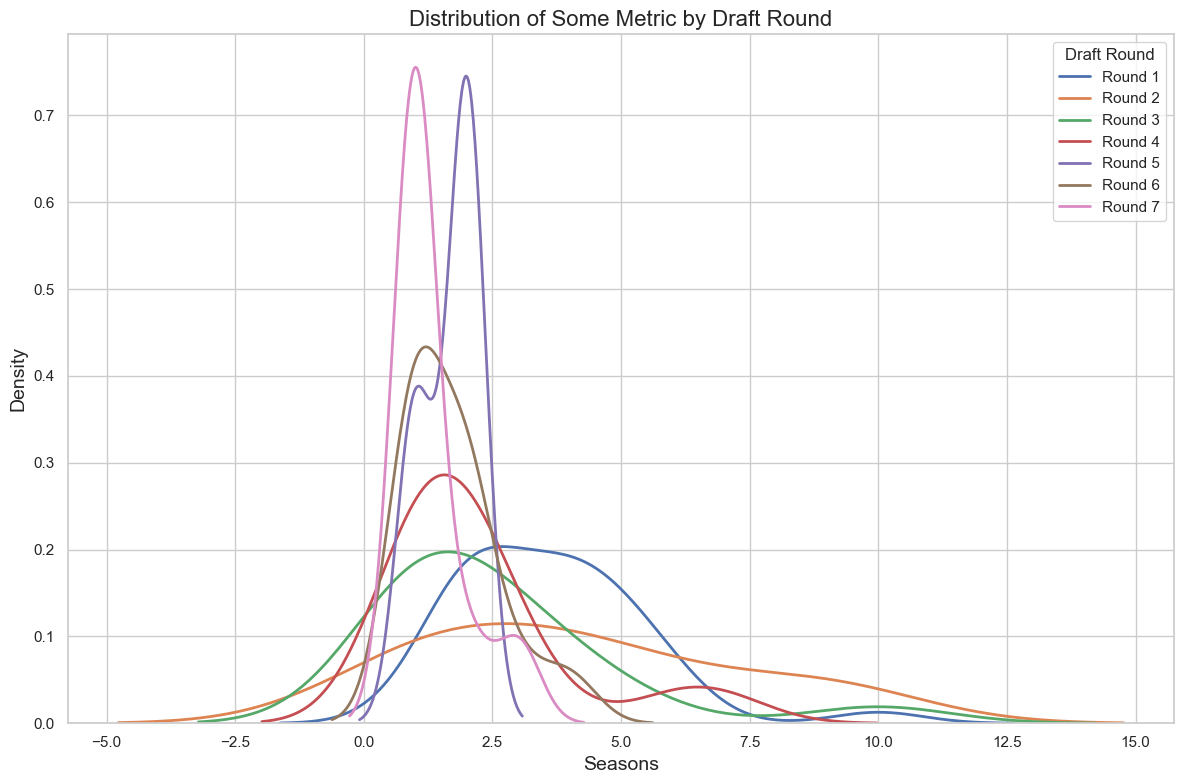

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "round": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
    "some_metric": [75, 80, 65, 70, 60, 55, 50, 53, 45, 40, 30, 35, 20, 25]
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(12, 8))

# Iterate through each draft round and plot the KDE
for round_num in sorted(final['round'].unique()):
    subset = final[final['round'] == round_num]
    sns.kdeplot(
        data=subset, 
        x="seasons_with_draft_team", 
        label=f"Round {round_num}", 
        linewidth=2
    )

# Customize the plot
plt.title("Distribution of Some Metric by Draft Round", fontsize=16)
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Draft Round")
plt.tight_layout()

# Show the plot
plt.show()


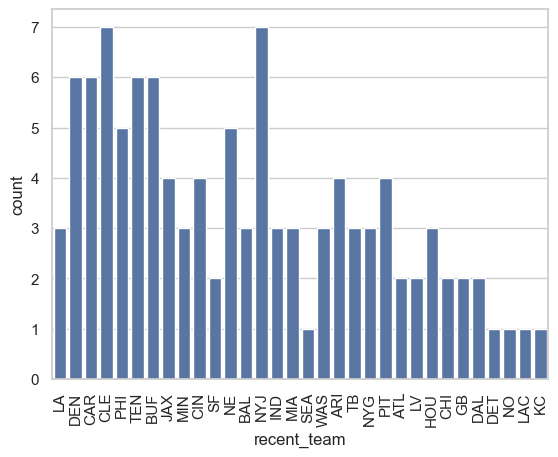

In [160]:
sns.countplot(data=final, x='recent_team').sort
plt.xticks(rotation=90)
plt.show()

In [161]:
positive = final[final['seasons_with_draft_team'] >= 4]
negative = final[final['seasons_with_draft_team'] < 4]

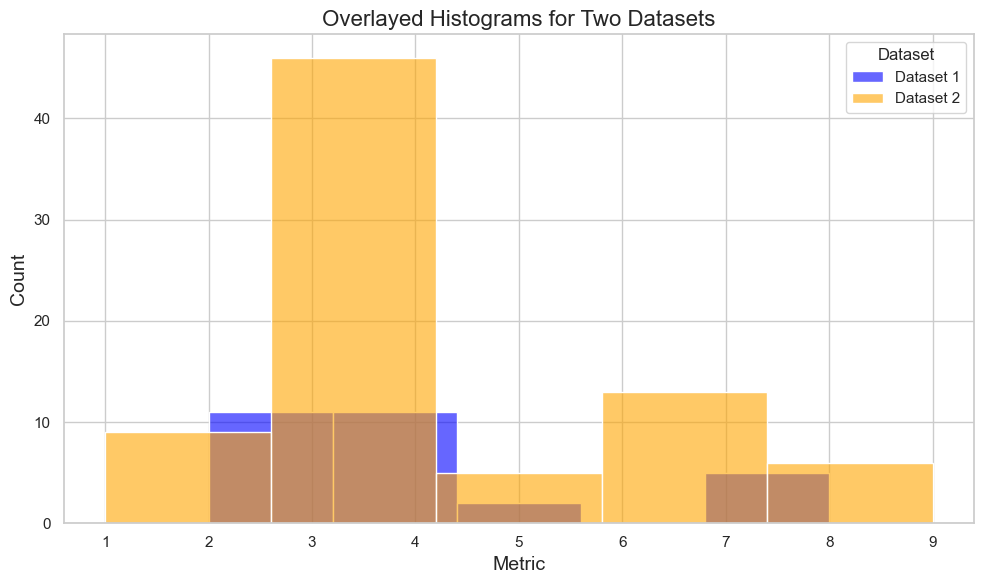

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Set the Seaborn style
sns.set(style="whitegrid")

# Plot histograms for both DataFrames
plt.figure(figsize=(10, 6))
sns.histplot(positive["college_seasons"], color="blue", label="Dataset 1", bins=5, alpha=0.6)
sns.histplot(negative["college_seasons"], color="orange", label="Dataset 2", bins=5, alpha=0.6)

# Customize the plot
plt.title("Overlayed Histograms for Two Datasets", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Dataset")
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='college_seasons', ylabel='Count'>

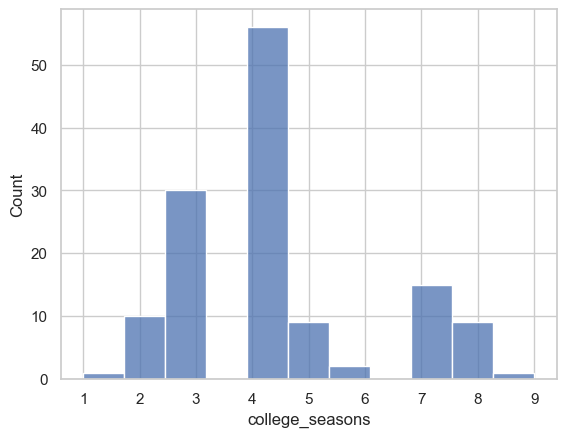

In [167]:
sns.histplot(data=final, x='college_seasons')

TypeError: 'value' must be an instance of str or bytes, not a float

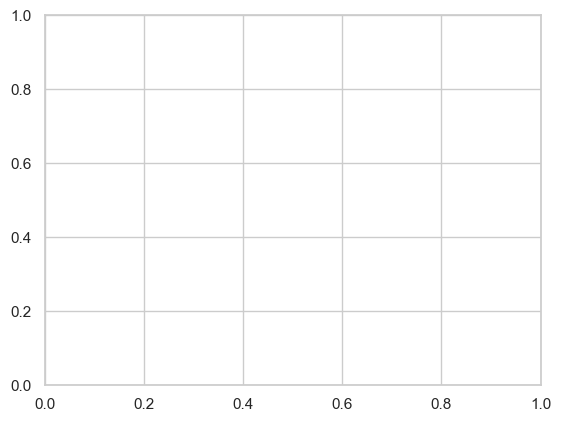

In [175]:
plt.scatter(x=final['TD'], y=final['Int'])

<Axes: xlabel='TD', ylabel='Int'>

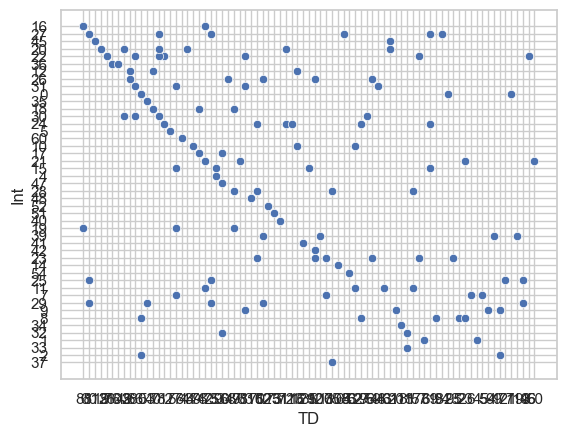

In [171]:
sns.scatterplot(data=final, x='TD', y='Int')